In [1]:
import os
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Removing corrupt data

In [4]:
import cv2
import imghdr

C:\Users\MatG\AppData\Local\Temp\ipykernel_31964\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir("classes"): 
    for image in os.listdir(os.path.join("classes", image_class)):
        image_path = os.path.join("classes", image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
dataset = tf.keras.utils.image_dataset_from_directory('classes')

Found 430 files belonging to 2 classes.


In [9]:
data_iterator = dataset.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

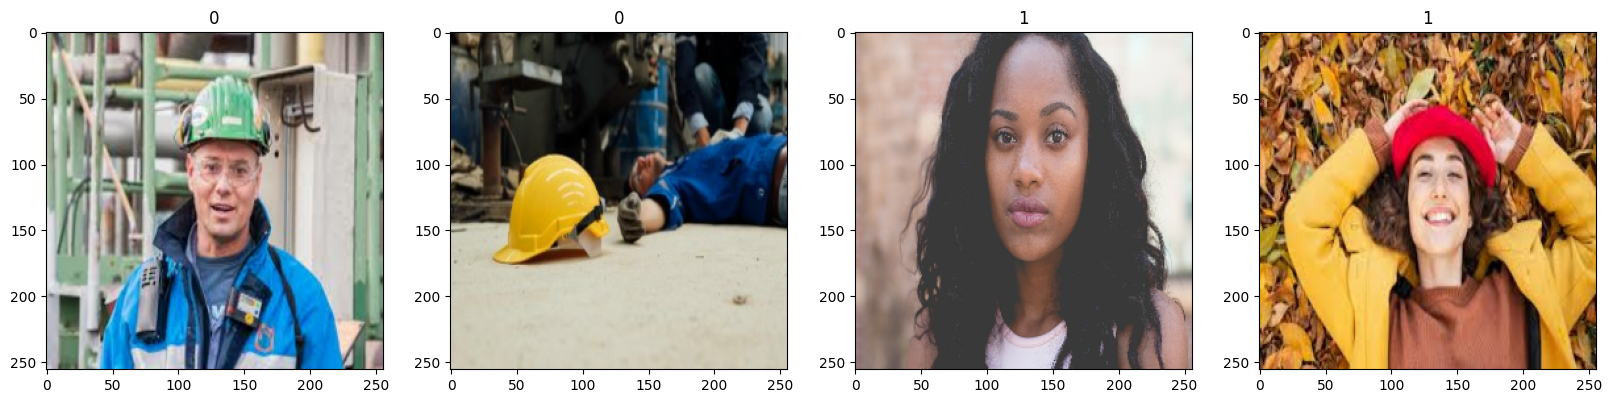

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
# Normalizing colour channels
dataset = dataset.map(lambda x,y: (x/255, y))

# Dividing into training, validation and testing

In [17]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2) + 1
test_size = int(len(dataset)*.1) + 1

In [18]:
len(dataset)
test_size + val_size + train_size

14

In [19]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

# Creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import Input

In [21]:
model = Sequential()

In [22]:
model.add(Input(shape = (256, 256, 3)))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.5182 - loss: 0.7519 - val_accuracy: 0.5208 - val_loss: 0.6716
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.5669 - loss: 0.6642 - val_accuracy: 0.5417 - val_loss: 0.6124
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.5581 - loss: 0.6046 - val_accuracy: 0.7604 - val_loss: 0.5709
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.7060 - loss: 0.5639 - val_accuracy: 0.6979 - val_loss: 0.5929
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.7411 - loss: 0.5548 - val_accuracy: 0.7812 - val_loss: 0.4352
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.7419 - loss: 0.5110 - val_accuracy: 0.7708 - val_loss: 0.4695
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.8697 - loss: 0.3810 - val_accuracy: 0.9167 - val_loss: 0.2854
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.8947 - loss: 0.3247 - val_accuracy: 0.9375 - val_loss:

# Plotting performance

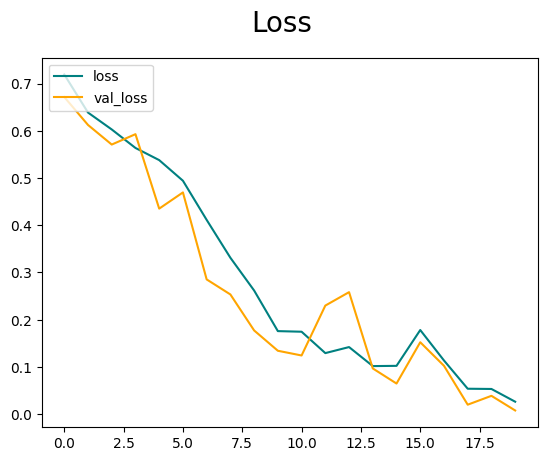

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

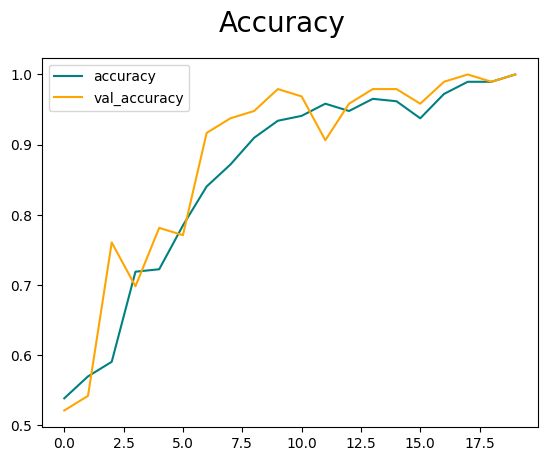

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [33]:
print(f"Precision: {precision.result()}, Recall: {recall.result()}, Accuracy: {accuracy.result()}")

Precision: 1.0, Recall: 0.9444444179534912, Accuracy: 0.97826087474823


# Testing

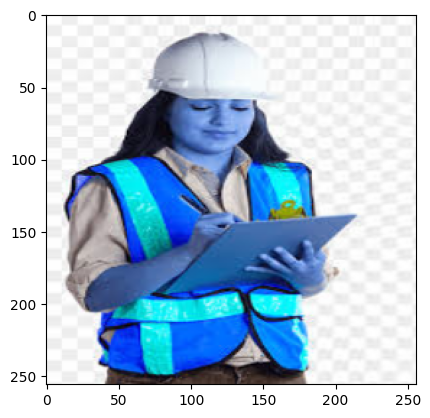

In [46]:
img = cv2.imread('nohardhattest.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [44]:
yhat

array([[0.7555161]], dtype=float32)

In [45]:

if yhat > 0.5: 
    print(f'Predicted class is no hard hat')
else:
    print(f'Predicted class is hard hat')

Predicted class is no hard hat
